In [7]:
from torch_geometric.data import Data
from torch_geometric.datasets import SNAPDataset
import numpy as np
import torch_geometric as tg
import torch
from utils import create_pointer_graph, bfs, get_diamenter

In [8]:
dataset = SNAPDataset('datasets/', 'soc-epinions1')
data = dataset.data
data.num_nodes = data.num_nodes[0]
graph = data
graph.x = torch.zeros(graph.num_nodes, 1)

In [9]:
pg = create_pointer_graph(graph)

In [57]:
vals1 = bfs(graph, 0, pg, 0)
vals2 = bfs(graph, 0, pg, 1)

In [77]:
random_nodes = []
import random
for i in range(100):
    node = random.randint(0, graph.num_nodes)
    vals0 = bfs(graph, node, pg, 0)
    nreachable = (vals0>=0).float().sum()
    random_nodes.append(nreachable)
    print(i, node, nreachable)


0 1228 tensor(47676.)
1 9624 tensor(47676.)
2 1116 tensor(47676.)
3 17120 tensor(47676.)
4 54317 tensor(1.)
5 8143 tensor(47678.)
6 1283 tensor(47676.)
7 69239 tensor(1.)
8 62920 tensor(47676.)
9 51887 tensor(1.)
10 14655 tensor(47677.)
11 46111 tensor(47676.)
12 6658 tensor(47676.)
13 23360 tensor(47676.)
14 56723 tensor(47676.)
15 33375 tensor(47676.)
16 36320 tensor(1.)
17 55918 tensor(47676.)
18 51273 tensor(1.)
19 53361 tensor(47676.)
20 63917 tensor(47676.)
21 50399 tensor(47677.)
22 50576 tensor(47678.)
23 30684 tensor(1.)
24 9279 tensor(47677.)
25 19384 tensor(47676.)
26 49445 tensor(47677.)
27 13208 tensor(47676.)
28 913 tensor(47676.)
29 61695 tensor(47676.)
30 11314 tensor(1.)
31 54094 tensor(1.)
32 8595 tensor(47676.)
33 27332 tensor(47676.)
34 36010 tensor(47677.)
35 37546 tensor(47677.)
36 73709 tensor(1.)
37 27300 tensor(47676.)
38 21913 tensor(47677.)
39 57571 tensor(1.)
40 13305 tensor(47676.)
41 10405 tensor(47676.)
42 33559 tensor(47678.)
43 6946 tensor(47676.)
44 30

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

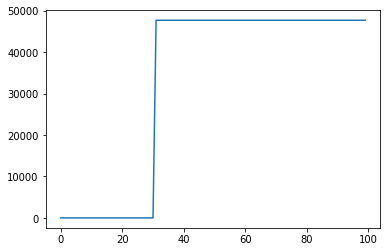

In [81]:
# for i in range(100):
#     random_nodes[i] = random_nodes[i].item()
random_nodes.sort()
import matplotlib.pyplot as plt 
plt.plot(random_nodes)
random_nodes[:10]

In [65]:
print("strongly conn", ((vals1>0).float() * (vals2>0).float()).mean())
print("in conn", (vals1>0).float().mean())
print("out conn", (vals2>0).float().mean())

strongly conn tensor(0.4246)
in conn tensor(0.6282)
out conn tensor(0.7440)


In [54]:
def bfs(graph, node, pointer_graph=None, pointer_inorout=0):
    vals = torch.zeros(graph.x.shape[0], 1)-1
    if pointer_graph is None:
        pg = create_pointer_graph(graph)
    else:
        pg = pointer_graph
    
    expanded, toexpand, newset = set(), set(), set()
    toexpand.add(node)
    vals[node, 0] = 0
    step = 1
    lastlen = len(expanded)+1

    while lastlen != len(expanded):
        lastlen = len(expanded)
        for toex in toexpand:
            for candidate in pg[toex][pointer_inorout]:
                if candidate not in expanded and candidate not in toexpand and candidate not in newset:
                    vals[candidate] = vals[candidate]*0 + step
                    newset.add(candidate)
            expanded.add(toex)
        toexpand = newset
        newset = set()
        step += 1

    return vals